# 안녕하세요^^
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

In [1]:
import pandas as pd

# 판다스 데이터프레임 행, 열 다 보여주기
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# 시각화 한글폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')
sns.set(font="NanumGothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
# 구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

# (실습준비) 데이터 불러오기부터

* 17년도부터 21년도 까지의 데이터를 train set, 22년도의 6개월치 데이터를 test set 으로 설정합니다.

In [4]:
# 학습 데이터 로딩
df_total = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차part1(복습)/결과 데이터프레임/df_total.csv')
df_test = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차part1(복습)/결과 데이터프레임/df_test.csv')

In [5]:
print(f'df_total shape : {df_total.shape}, df_test shape : {df_test.shape}')

df_total shape : (43800, 31), df_test shape : (4344, 31)


---

# 1. 데이터 전처리

#### [실습문제1] 열 추가
* 기존 '기준일ID'열에서 날짜 데이터를 추출하여 새로운 열로 추가 합니다.
    - pd.to_datetime() 함수를 사용해 '기준일ID'열을 datetime 형식으로 변경하겠습니다.
    - year, month, day 열로 기존 데이터 프레임에 연월일 정보를 저장합니다.
    - 데이터 프레임 열에 대해 날짜 정보를 얻을 때에는 **dt.year**, **dt.month**, **dt.day** 속성을 사용합니다.

In [6]:
datetime = df_total['기준일ID'] + ' ' + df_total['시간대구분'].astype(str).str.zfill(2) + ':00' # 기준일 ID를 datetime 데이터타입으로 변경

df_total['기준일ID'] = pd.to_datetime(datetime) # 새로 생성한 문자열을 datetime 타입으로 변환

In [7]:
datetime = df_test['기준일ID'] + ' ' + df_test['시간대구분'].astype(str).str.zfill(2) + ':00' # 기준일 ID를 datetime 데이터타입으로 변경

df_test['기준일ID'] = pd.to_datetime(datetime) # 새로 생성한 문자열을 datetime 타입으로 변환

In [8]:
df_total.head(1)

기준일ID  시간대구분    총생활인구수  남자0세부터9세생활인구수  남자10세부터14세생활인구수  \
0 2017-01-01      0  31535.22      1945.4402         566.4588   

   남자15세부터19세생활인구수  남자20세부터24세생활인구수  남자25세부터29세생활인구수  남자30세부터34세생활인구수  \
0         631.5581         991.9184        1297.1287        1223.1529   

   남자35세부터39세생활인구수  남자40세부터44세생활인구수  남자45세부터49세생활인구수  남자50세부터54세생활인구수  \
0        1552.9448        1236.7535        1172.5566         980.4305   

   남자55세부터59세생활인구수  남자60세부터64세생활인구수  남자65세부터69세생활인구수  남자70세이상생활인구수  \
0        1031.4326         969.2316         582.7779     1312.8853   

   여자0세부터9세생활인구수  여자10세부터14세생활인구수  여자15세부터19세생활인구수  여자20세부터24세생활인구수  \
0      2145.5925         576.1589         632.6208        1030.7914   

   여자25세부터29세생활인구수  여자30세부터34세생활인구수  여자35세부터39세생활인구수  여자40세부터44세생활인구수  \
0        1157.6661        1107.6781        1282.9235         1029.436   

   여자45세부터49세생활인구수  여자50세부터54세생활인구수  여자55세부터59세생활인구수  여자60세부터64세생활인구수  \
0         998.0414         874.5643        1162.1547        1053.0477   

   여자65세부터69세생활인구수  여자70세이상생활인구수  
0          964.394     2025.4819

* '유동인구', '비유동인구' 변수를 추가한다.
   * broadcasting 적용

In [9]:
df_total['유동인구'] = df_total['남자20세부터24세생활인구수'] + df_total['남자25세부터29세생활인구수'] + df_total['남자30세부터34세생활인구수'] + df_total['남자35세부터39세생활인구수'] + df_total['남자40세부터44세생활인구수'] + df_total['남자45세부터49세생활인구수'] + df_total['남자50세부터54세생활인구수'] + df_total['남자55세부터59세생활인구수'] + df_total['여자0세부터9세생활인구수'] + df_total['여자20세부터24세생활인구수'] + df_total['여자25세부터29세생활인구수'] + df_total['여자30세부터34세생활인구수'] + df_total['여자35세부터39세생활인구수'] + df_total['여자40세부터44세생활인구수'] + df_total['여자45세부터49세생활인구수'] + df_total['여자50세부터54세생활인구수'] + df_total['여자55세부터59세생활인구수']
df_total['비유동인구'] = df_total['남자0세부터9세생활인구수'] + df_total['남자10세부터14세생활인구수'] + df_total['남자15세부터19세생활인구수'] + df_total['남자60세부터64세생활인구수'] + df_total['남자65세부터69세생활인구수'] + df_total['남자70세이상생활인구수'] + df_total['여자10세부터14세생활인구수'] + df_total['여자15세부터19세생활인구수'] + df_total['여자60세부터64세생활인구수'] + df_total['여자65세부터69세생활인구수'] + df_total['여자70세이상생활인구수']

In [10]:
df_test['유동인구'] = df_test['남자20세부터24세생활인구수'] + df_test['남자25세부터29세생활인구수'] + df_test['남자30세부터34세생활인구수'] + df_test['남자35세부터39세생활인구수'] + df_test['남자40세부터44세생활인구수'] + df_test['남자45세부터49세생활인구수'] + df_test['남자50세부터54세생활인구수'] + df_test['남자55세부터59세생활인구수'] + df_test['여자0세부터9세생활인구수'] + df_test['여자20세부터24세생활인구수'] + df_test['여자25세부터29세생활인구수'] + df_test['여자30세부터34세생활인구수'] + df_test['여자35세부터39세생활인구수'] + df_test['여자40세부터44세생활인구수'] + df_test['여자45세부터49세생활인구수'] + df_test['여자50세부터54세생활인구수'] + df_test['여자55세부터59세생활인구수']
df_test['비유동인구'] = df_test['남자0세부터9세생활인구수'] + df_test['남자10세부터14세생활인구수'] + df_test['남자15세부터19세생활인구수'] + df_test['남자60세부터64세생활인구수'] + df_test['남자65세부터69세생활인구수'] + df_test['남자70세이상생활인구수'] + df_test['여자10세부터14세생활인구수'] + df_test['여자15세부터19세생활인구수'] + df_test['여자60세부터64세생활인구수'] + df_test['여자65세부터69세생활인구수'] + df_test['여자70세이상생활인구수']

#### [실습문제2] 불필요한 열 제거 및 열 이름 변경
* df_total과 df_test에서 '총생활인구수'외에 불필요한 열을 제거 하도록 하겠습니다.
* 시간 데이터를 남기고, '시간대구분' column 을 'hour'로 rename 하도록 하겠습니다.

In [11]:
# 남자 0세부터 9세 생활인구수 ~ 여자 70세 이상 생활 인구수 변수를 삭제한다.
df_total.drop(['남자0세부터9세생활인구수', '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',	'남자30세부터34세생활인구수', '남자35세부터39세생활인구수',	'남자40세부터44세생활인구수','남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',	'남자60세부터64세생활인구수', '남자65세부터69세생활인구수',	'남자70세이상생활인구수', '여자0세부터9세생활인구수', '여자10세부터14세생활인구수',	'여자15세부터19세생활인구수', '여자20세부터24세생활인구수',	'여자25세부터29세생활인구수', '여자30세부터34세생활인구수',	'여자35세부터39세생활인구수', '여자40세부터44세생활인구수',	'여자45세부터49세생활인구수',	'여자50세부터54세생활인구수',	'여자55세부터59세생활인구수',	'여자60세부터64세생활인구수',	'여자65세부터69세생활인구수',	'여자70세이상생활인구수'], axis=1, inplace=True)

# 남자 0세부터 9세 생활인구수 ~ 여자 70세 이상 생활 인구수 변수를 삭제한다.
df_test.drop(['남자0세부터9세생활인구수', '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',	'남자30세부터34세생활인구수', '남자35세부터39세생활인구수',	'남자40세부터44세생활인구수','남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',	'남자60세부터64세생활인구수', '남자65세부터69세생활인구수',	'남자70세이상생활인구수', '여자0세부터9세생활인구수', '여자10세부터14세생활인구수',	'여자15세부터19세생활인구수', '여자20세부터24세생활인구수',	'여자25세부터29세생활인구수', '여자30세부터34세생활인구수',	'여자35세부터39세생활인구수', '여자40세부터44세생활인구수',	'여자45세부터49세생활인구수',	'여자50세부터54세생활인구수',	'여자55세부터59세생활인구수',	'여자60세부터64세생활인구수',	'여자65세부터69세생활인구수',	'여자70세이상생활인구수'], axis=1, inplace=True)

In [12]:
df_total.head(1)

기준일ID  시간대구분    총생활인구수       유동인구       비유동인구
0 2017-01-01      0  31535.22  20275.166  11260.0552

In [13]:
df_test.head(1)

기준일ID  시간대구분      총생활인구수        유동인구       비유동인구
0 2022-01-01      0  30509.7386  20263.2335  10246.5077

#### [실습문제3] 시프트 & 롤링
* shift()를 활용하여 이동할 행 수를 지정합니다.
* rolling()을 활용하여 추가할 이동평균 수를 지정합니다.

* 하루 뒤(1일 후, 같은 시간대)를 예측할 것이다.
  * '하루 전 총생활인구수', '하루 전 유동인구', '하루 전 비유동인구' 변수를 추가한다.

  * '하루 뒤 총생활인구수' 변수를 추가한다. (Target)

In [14]:
df_total.head(5)

기준일ID  시간대구분      총생활인구수        유동인구       비유동인구
0 2017-01-01 00:00:00      0  31535.2200  20275.1660  11260.0552
1 2017-01-01 01:00:00      1  31188.9174  20067.9000  11121.0182
2 2017-01-01 02:00:00      2  31240.4974  20183.7367  11056.7602
3 2017-01-01 03:00:00      3  31442.4314  20276.3294  11166.1016
4 2017-01-01 04:00:00      4  31922.7751  20736.3245  11186.4478

In [15]:
# 24시간 전의 데이터 가져오기
df_total['하루 전 총생활인구수']= df_total['총생활인구수'].shift(24)
df_total['하루 전 유동인구'] = df_total['유동인구'].shift(24)
df_total['하루 전 비유동인구'] = df_total['비유동인구'].shift(24)

In [16]:
df_total.head(24)

기준일ID  시간대구분      총생활인구수        유동인구       비유동인구  \
0  2017-01-01 00:00:00      0  31535.2200  20275.1660  11260.0552   
1  2017-01-01 01:00:00      1  31188.9174  20067.9000  11121.0182   
2  2017-01-01 02:00:00      2  31240.4974  20183.7367  11056.7602   
3  2017-01-01 03:00:00      3  31442.4314  20276.3294  11166.1016   
4  2017-01-01 04:00:00      4  31922.7751  20736.3245  11186.4478   
5  2017-01-01 05:00:00      5  33633.7304  21907.0407  11726.6897   
6  2017-01-01 06:00:00      6  34876.8006  22854.9545  12021.8469   
7  2017-01-01 07:00:00      7  35358.9775  23234.0442  12124.9306   
8  2017-01-01 08:00:00      8  36038.7688  23537.1377  12501.6329   
9  2017-01-01 09:00:00      9  37353.1794  24712.8368  12640.3409   
10 2017-01-01 10:00:00     10  37534.7596  24543.8806  12990.8798   
11 2017-01-01 11:00:00     11  38257.1671  25256.2066  13000.9663   
12 2017-01-01 12:00:00     12  38423.5288  25495.8027  12927.7267   
13 2017-01-01 13:00:00     13  37666.9073  25119.2627  12547.6464   
14 2017-01-01 14:00:00     14  37287.4833  24712.4215  12575.0606   
15 2017-01-01 15:00:00     15  38144.0804  25478.9926  12665.0852   
16 2017-01-01 16:00:00     16  37444.9623  24860.0354  12584.9274   
17 2017-01-01 17:00:00     17  37292.5709  25081.6402  12210.9285   
18 2017-01-01 18:00:00     18  38139.0160  25709.8168  12429.1966   
19 2017-01-01 19:00:00     19  37368.8302  24989.4286  12379.4020   
20 2017-01-01 20:00:00     20  35517.1900  23526.7006  11990.4909   
21 2017-01-01 21:00:00     21  34695.3430  22919.8549  11775.4886   
22 2017-01-01 22:00:00     22  35035.7382  23372.8788  11662.8612   
23 2017-01-01 23:00:00     23  30863.1777  20000.6699  10862.5087   

    하루 전 총생활인구수  하루 전 유동인구  하루 전 비유동인구  
0           NaN        NaN         NaN  
1           NaN        NaN         NaN  
2           NaN        NaN         NaN  
3           NaN        NaN         NaN  
4           NaN        NaN         NaN  
5           NaN        NaN         NaN  
6           NaN        NaN         NaN  
7           NaN        NaN         NaN  
8           NaN        NaN         NaN  
9           NaN        NaN         NaN  
10          NaN        NaN         NaN  
11          NaN        NaN         NaN  
12          NaN        NaN         NaN  
13          NaN        NaN         NaN  
14          NaN        NaN         NaN  
15          NaN        NaN         NaN  
16          NaN        NaN         NaN  
17          NaN        NaN         NaN  
18          NaN        NaN         NaN  
19          NaN        NaN         NaN  
20          NaN        NaN         NaN  
21          NaN        NaN         NaN  
22          NaN        NaN         NaN  
23          NaN        NaN         NaN

In [17]:
# 24시간 전의 데이터 가져오기
df_test['하루 전 총생활인구수']= df_test['총생활인구수'].shift(24)
df_test['하루 전 유동인구'] = df_test['유동인구'].shift(24)
df_test['하루 전 비유동인구'] = df_test['비유동인구'].shift(24)

In [18]:
df_test.head(5)

기준일ID  시간대구분      총생활인구수        유동인구       비유동인구  하루 전 총생활인구수  \
0 2022-01-01 00:00:00      0  30509.7386  20263.2335  10246.5077          NaN   
1 2022-01-01 01:00:00      1  30759.5067  20451.1147  10308.3933          NaN   
2 2022-01-01 02:00:00      2  31048.8787  20479.7378  10569.1413          NaN   
3 2022-01-01 03:00:00      3  31076.1092  20654.0596  10422.0490          NaN   
4 2022-01-01 04:00:00      4  31714.9309  21006.0597  10708.8706          NaN   

   하루 전 유동인구  하루 전 비유동인구  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN

In [19]:
# 하루 뒤(1일 후, 같은 시간대) 총생활인구수를 가져온다. (Target이 될 예정)
df_total['하루 뒤 총생활인구수'] = df_total['총생활인구수'].shift(-24)

In [20]:
# 하루 뒤(1일 후, 같은 시간대) 총생활인구수를 가져온다. (Target이 될 예정)
df_test['하루 뒤 총생활인구수'] = df_test['총생활인구수'].shift(-24)

#### [실습문제4] 결측치 처리 및 불필요한 열 제거
* 롤링 & 시프트 과정에서 발생한 결측치를 처리하도록 하겠습니다.
* 불필요한 열을 추가로 제거 하겠습니다.(시간 관련 행들)

* train) 현재 2017년 1월 1일 데이터는 '하루 전 총생활인구수', '하루 전 유동인구', '하루 전 비유동인구'가 NaN이다.<br> 결국 2016년 12월 31일 데이터가 필요한데 이게 무슨 동의 데이터인지 모르는 이상 이를 구할 수 있는 방법이 일단은 없다. 그래서 그냥 2017년 1월 1일 데이터는 삭제하려고 한다.

In [21]:
# '기준일ID' 열이 '2017-01-01'인 행을 필터링하여 데이터프레임 업데이트
df_total = df_total.iloc[24:]

* test) 현재 2022년 1월 1일 데이터는 '하루 전 총생활인구수', '하루 전 유동인구', '하루 전 비유동인구'가 NaN이다.<br> 우리는 2021년 12월 31일 데이터를 찾을 수 있으므로 그 점을 이용해서 NaN을 채운다.

In [22]:
# 2021년 12월 31일 '총생활인구수', '유동인구', '비유동인구' 데이터를 가져옴
tt = df_total[['총생활인구수', '유동인구', '비유동인구']].tail(24)

In [23]:
# NaN 값을 채우기 위한 인덱스 범위 설정
start_idx = df_test.loc[df_test['하루 전 총생활인구수'].isna()].index[0]
end_idx = df_test.loc[df_test['하루 전 총생활인구수'].isna()].index[-1] + 1

# '하루 전 총생활인구수' 채우기
df_test.iloc[start_idx:end_idx:1, df_test.columns.get_loc('하루 전 총생활인구수')] = tt['총생활인구수'].values

# '하루 전 유동인구' 채우기
df_test.iloc[start_idx:end_idx:1, df_test.columns.get_loc('하루 전 유동인구')] = tt['유동인구'].values

#'하루 전 비유동인구' 채우기
df_test.iloc[start_idx:end_idx:1, df_test.columns.get_loc('하루 전 비유동인구')] = tt['비유동인구'].values

In [24]:
df_test.head(24)

기준일ID  시간대구분      총생활인구수        유동인구       비유동인구  \
0  2022-01-01 00:00:00      0  30509.7386  20263.2335  10246.5077   
1  2022-01-01 01:00:00      1  30759.5067  20451.1147  10308.3933   
2  2022-01-01 02:00:00      2  31048.8787  20479.7378  10569.1413   
3  2022-01-01 03:00:00      3  31076.1092  20654.0596  10422.0490   
4  2022-01-01 04:00:00      4  31714.9309  21006.0597  10708.8706   
5  2022-01-01 05:00:00      5  33368.3456  22319.6176  11048.7282   
6  2022-01-01 06:00:00      6  34962.7828  23557.3661  11405.4169   
7  2022-01-01 07:00:00      7  34948.9644  23570.0485  11378.9168   
8  2022-01-01 08:00:00      8  34311.2156  23249.2316  11061.9830   
9  2022-01-01 09:00:00      9  33966.9820  23195.3055  10771.6775   
10 2022-01-01 10:00:00     10  34039.4022  23277.4894  10761.9143   
11 2022-01-01 11:00:00     11  33570.1052  22686.8700  10883.2348   
12 2022-01-01 12:00:00     12  33307.6517  22634.7659  10672.8863   
13 2022-01-01 13:00:00     13  33125.8385  22522.8914  10602.9470   
14 2022-01-01 14:00:00     14  32584.0065  22160.2877  10423.7207   
15 2022-01-01 15:00:00     15  31298.8122  21219.9989  10078.8127   
16 2022-01-01 16:00:00     16  30426.6285  20527.8928   9898.7364   
17 2022-01-01 17:00:00     17  30445.2773  20445.2876   9999.9891   
18 2022-01-01 18:00:00     18  30258.8998  20509.3912   9749.5077   
19 2022-01-01 19:00:00     19  30071.1298  20307.1081   9764.0217   
20 2022-01-01 20:00:00     20  30140.0597  20306.3892   9833.6702   
21 2022-01-01 21:00:00     21  30183.2726  20280.6720   9902.6004   
22 2022-01-01 22:00:00     22  30694.2288  20613.6100  10080.6195   
23 2022-01-01 23:00:00     23  31496.5201  20911.7938  10584.7256   

    하루 전 총생활인구수   하루 전 유동인구  하루 전 비유동인구  하루 뒤 총생활인구수  
0    31794.9226  21076.0275  10718.8953   30524.7434  
1    32039.8527  21204.0697  10835.7832   31024.0247  
2    32242.6914  21313.4437  10929.2471   31195.0739  
3    32551.5614  21567.2736  10984.2888   31349.9642  
4    33243.3180  22137.4695  11105.8490   31993.0440  
5    35047.0114  23436.8514  11610.1586   33046.6075  
6    36589.9280  24766.3133  11823.6162   34712.7213  
7    37520.1656  25804.1258  11716.0384   35525.9355  
8    38074.5345  26535.1793  11539.3553   35272.5722  
9    37992.3427  26193.9368  11798.4045   34678.9450  
10   37908.4872  25840.8598  12067.6264   35748.2902  
11   38130.5375  26075.6049  12054.9322   35327.6185  
12   38306.0838  26303.7195  12002.3631   35240.7791  
13   39452.9085  27504.5336  11948.3759   35513.3604  
14   38546.9114  26920.5590  11626.3509   36023.9606  
15   37018.4693  25752.1061  11266.3621   35326.1681  
16   36488.7566  25310.2651  11178.4917   34271.9388  
17   37475.1622  26257.9826  11217.1808   35343.8183  
18   35883.1874  24909.1451  10974.0426   35115.2479  
19   33060.4555  22782.5220  10277.9334   33738.4315  
20   32360.1898  21899.1230  10461.0665   33151.0877  
21   31417.3991  21122.9105  10294.4883   33063.4607  
22   30763.0563  20447.2329  10315.8227   32491.0283  
23   30404.2740  20200.0758  10204.2000   32501.9309

* train) 2021년 12월 31일 '하루 뒤 총생활인구수'(Target) 결측치를 채운다.
  * 2022년 1월 1일 '총생활인구수' 데이터가 있으니 그것을 이용해서 NaN를 대체한다.

In [27]:
# 2022년 1월 1일 '총생활인구수' 데이터를 가져옴
gg = df_test['총생활인구수'].values[0:24:1]
gg

array([30509.7386, 30759.5067, 31048.8787, 31076.1092, 31714.9309,
       33368.3456, 34962.7828, 34948.9644, 34311.2156, 33966.982 ,
       34039.4022, 33570.1052, 33307.6517, 33125.8385, 32584.0065,
       31298.8122, 30426.6285, 30445.2773, 30258.8998, 30071.1298,
       30140.0597, 30183.2726, 30694.2288, 31496.5201])

In [28]:
# 데이터프레임의 '하루 뒤 총생활인구수' 열의 마지막 24개 행에 new_values 값을 할당
df_total['하루 뒤 총생활인구수'].iloc[-24:] = gg

* test) 2022년 6월 30일 데이터 같은 경우 '하루 뒤 총생활인구수'가 NaN인데  2022년 7월 1일 '총생활인구수'를 구할 방법이 없다. 따라서 2022년 6월 30일 경우 행을 버리기도 했다.

In [29]:
df_test = df_test.iloc[0:4320:1]

* 상관 계수를 전체적으로 확인하고 점수가 낮거나, 다중 공선성을 고려하여 모델링에 들어갈 변수만 남긴다.

<ipython-input-30-1dac395eddd3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_total.corr()


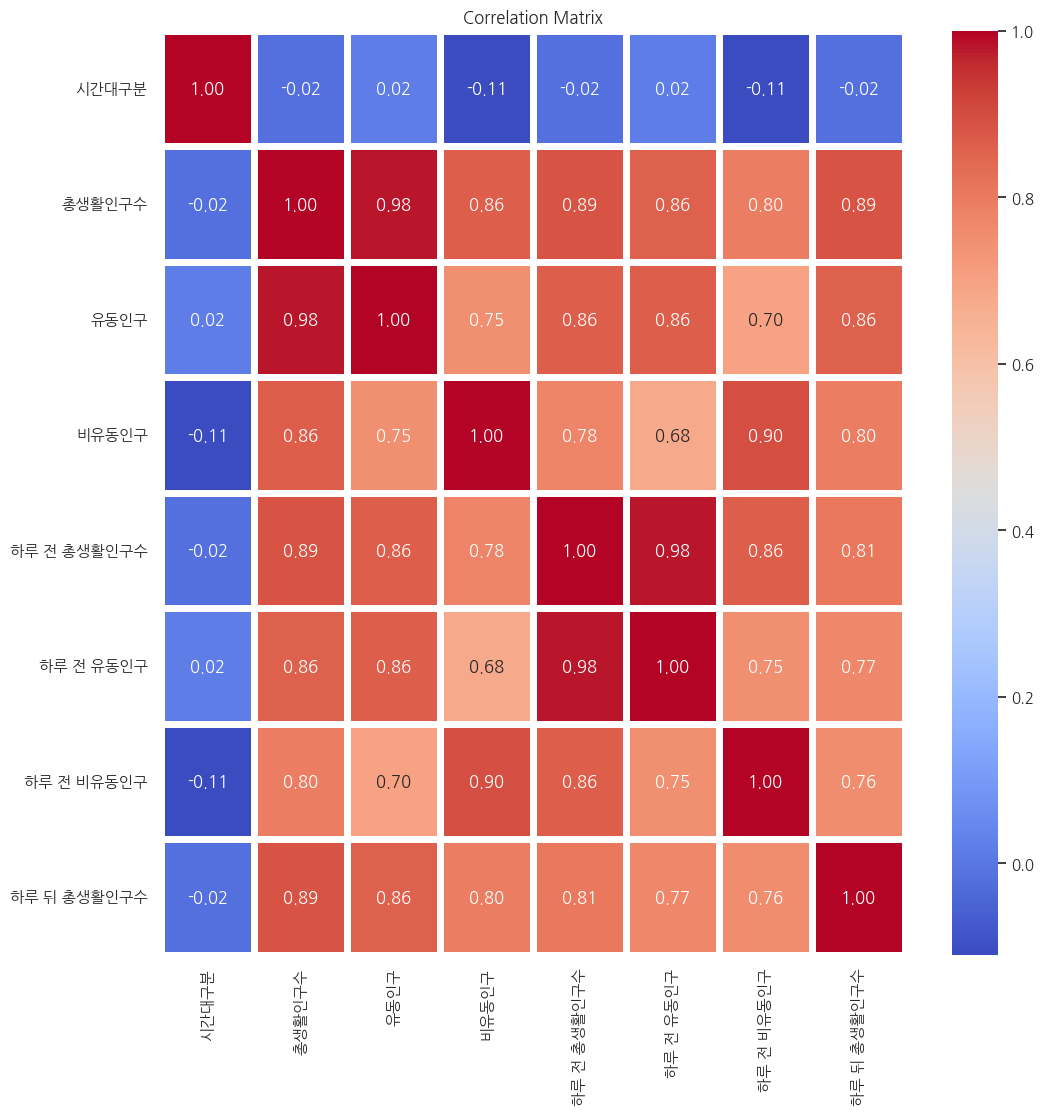

In [30]:
corr_matrix = df_total.corr()

# 상관 계수 확인
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=5.0, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [34]:
# '기준일ID', '시간대구분' 열 지우기
df_total.drop(['기준일ID', '시간대구분'], axis=1, inplace=True)
df_test.drop(['기준일ID', '시간대구분'], axis=1, inplace=True)

#### [실습문제5] train, test 데이터 나누기
* df_total과 df_test를 각각 train_x, train_y, test_x, test_y 로 나누어 주세요.
* 인덱스를 리셋 해주세요.

In [40]:
# train 데이터 인덱스 리셋하기
df_total = df_total.reset_index(drop=True)

In [42]:
train_x = df_total.drop(['하루 뒤 총생활인구수'], axis=1)
train_y = df_total['하루 뒤 총생활인구수']

test_x = df_test.drop(['하루 뒤 총생활인구수'], axis=1)
test_y = df_test['하루 뒤 총생활인구수']

In [48]:
# 다중 공선성 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_total  = pd.DataFrame()
vif_total['Vif Factor'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif_total['features'] = train_x.columns
vif_total

Vif Factor     features
0  6.004800e+14       총생활인구수
1  2.905548e+14         유동인구
2  6.045100e+13        비유동인구
3  6.004800e+14  하루 전 총생활인구수
4  2.905548e+14    하루 전 유동인구
5  6.045100e+13   하루 전 비유동인구

* 이번 프로젝트는 어떤 변수를 사용하던간에 다중 공선성을 피해갈 수가 없다.

---

## 다음 단계를 위해서 데이터를 저장하겠습니다.

In [49]:
# CSV로 저장
train_x.to_csv('/content/drive/MyDrive/미니프로젝트4차part1(복습)/결과 데이터프레임/train_x.csv', index = False)
train_y.to_csv('/content/drive/MyDrive/미니프로젝트4차part1(복습)/결과 데이터프레임/train_y.csv', index = False)
test_x.to_csv('/content/drive/MyDrive/미니프로젝트4차part1(복습)/결과 데이터프레임/test_x.csv', index = False)
test_y.to_csv('/content/drive/MyDrive/미니프로젝트4차part1(복습)/결과 데이터프레임/test_y.csv', index = False)

---